In [60]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
import koreanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


df=pd.read_csv("../data/fish.csv")
df.drop('Diagonal',axis='columns',inplace=True)
df=df[df["Species"]=="Perch"].reset_index(drop=True)
df[df.columns[1:]].corr()["Weight"]

Weight    1.000000
Length    0.958656
Height    0.968441
Width     0.963943
Name: Weight, dtype: float64

In [61]:
target=df["Weight"]
feature=df[["Length","Width","Height"]]
x_train, x_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    test_size=0.3)

In [62]:
std_scaler=StandardScaler()
mm_scaler=MinMaxScaler()
rb_scaler=RobustScaler()
sl=[std_scaler, mm_scaler, rb_scaler]

sv= [[],[],[]]
sv2=[[],[],[]]

for i,v in enumerate(sl) :
    v.fit(x_train)
    sv[i]=v.transform(x_train).copy()
    v.fit(x_test)
    sv2[i]=v.transform(x_test).copy()
    
    
x_train_std=sv[0]
x_train_mm=sv[1]
x_train_rb=sv[2]
x_test_std=sv2[0]
x_test_mm=sv2[1]
x_test_rb=sv2[2]

In [63]:
dataset=[x_train_std, x_train_mm, x_train_rb, x_test_std, x_test_mm, x_test_rb]
score_list=[]
for i in range(int(len(dataset)/2)) :
    model=LinearRegression()
    model.fit(dataset[i], y_train)
    train_score=model.score(dataset[i], y_train)
    model.fit(dataset[i+3], y_test)
    test_score=model.score(dataset[i+3], y_test)
    y_pre=model.predict(dataset[i+3])
    mse=mean_squared_error(y_test, y_pre, squared=False)
    mae=mean_absolute_error(y_test, y_pre)
    score_list.append([train_score, test_score, mse, mae])


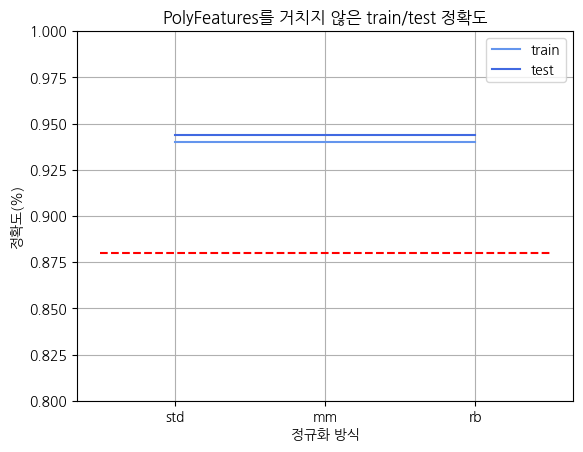

In [64]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
data=np.array(score_list).T
plt.plot(range(3), data[0], color='cornflowerblue', label='train')
plt.plot(range(3), data[1], color='royalblue', label='test')
plt.legend()
plt.hlines(y=0.88, xmin=-0.5, xmax=2.5, colors='r', linestyles='dashed', label='Horizontal Line')
plt.xticks(range(3), ['std', 'mm', 'rb'])
plt.xlabel("정규화 방식")
plt.ylabel("정확도(%)")
plt.title("PolyFeatures를 거치지 않은 train/test 정확도")
plt.ylim(0.8, 1)
plt.grid(True)
plt.savefig("PolyFeature False")
plt.show()


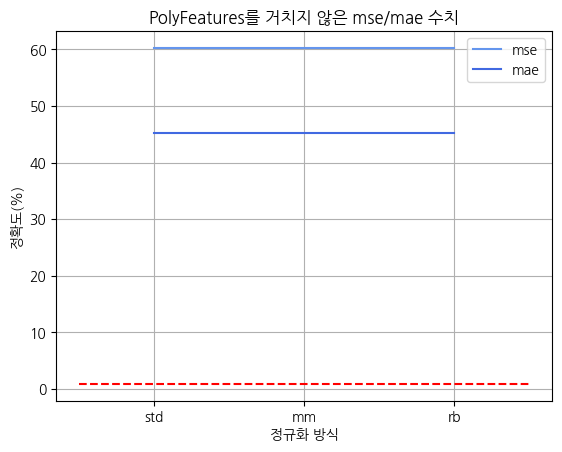

In [65]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
data=np.array(score_list).T
plt.plot(range(3), data[2], color='cornflowerblue', label='mse')
plt.plot(range(3), data[3], color='royalblue', label='mae')
plt.legend()
plt.hlines(y=0.88, xmin=-0.5, xmax=2.5, colors='r', linestyles='dashed', label='Horizontal Line')
plt.xticks(range(3), ['std', 'mm', 'rb'])
plt.xlabel("정규화 방식")
plt.ylabel("정확도(%)")
plt.title("PolyFeatures를 거치지 않은 mse/mae 수치")
#plt.ylim(0.0, 1)
plt.grid(True)
plt.savefig("PolyFeature False_E.png")
plt.show()

In [66]:
# PolyFeatures 적용
poly = PolynomialFeatures(degree=2, include_bias=False)
df2=pd.DataFrame(poly.fit_transform(df[df.columns[2:]]), columns=poly.get_feature_names_out())
result= pd.concat([df[["Weight"]],df2],axis=1) 
result.corr()["Weight"] # Length Height, Length Width, Height Width => 3개로 추림

Weight           1.000000
Length           0.958656
Height           0.968441
Width            0.963943
Length^2         0.982416
Length Height    0.989600
Length Width     0.988456
Height^2         0.988481
Height Width     0.987965
Width^2          0.976745
Name: Weight, dtype: float64

In [67]:
result.head(1)


,Weight,Length,Height,Width,Length^2,Length Height,Length Width,Height^2,Height Width,Width^2
0,5.9,8.4,2.112,1.408,70.56,17.7408,11.8272,4.460544,2.973696,1.982464


In [68]:
target=result["Weight"]
feature=result[["Length Height","Length Width","Height Width"]]
x_train, x_test, y_train, y_test = train_test_split(feature, 
                                                    target, 
                                                    test_size=0.3)

In [69]:
std_scaler=StandardScaler()
mm_scaler=MinMaxScaler()
rb_scaler=RobustScaler()
sl=[std_scaler, mm_scaler, rb_scaler]

sv= [[],[],[]]
sv2=[[],[],[]]

for i,v in enumerate(sl) :
    v.fit(x_train)
    sv[i]=v.transform(x_train).copy()
    v.fit(x_test)
    sv2[i]=v.transform(x_test).copy()
    
    
x_train_std=sv[0]
x_train_mm=sv[1]
x_train_rb=sv[2]
x_test_std=sv2[0]
x_test_mm=sv2[1]
x_test_rb=sv2[2]

In [70]:

dataset=[x_train_std, x_train_mm, x_train_rb, x_test_std, x_test_mm, x_test_rb]
score_list=[]
for i in range(int(len(dataset)/2)) :
    model=LinearRegression()
    model.fit(dataset[i], y_train)
    train_score=model.score(dataset[i], y_train)
    model.fit(dataset[i+3], y_test)
    test_score=model.score(dataset[i+3], y_test)
    y_pre=model.predict(dataset[i+3])
    mse=mean_squared_error(y_test, y_pre, squared=False)
    mae=mean_absolute_error(y_test, y_pre)
    score_list.append([train_score, test_score, mse, mae])


In [71]:
score_list

[[0.9831370157017895,
  0.9863625927662361,
  32.35742086240573,
  23.02395122499712],
 [0.9831370157017895, 0.986362592766236, 32.35742086240577, 23.02395122499714],
 [0.9831370157017895, 0.986362592766236, 32.35742086240576, 23.02395122499714]]

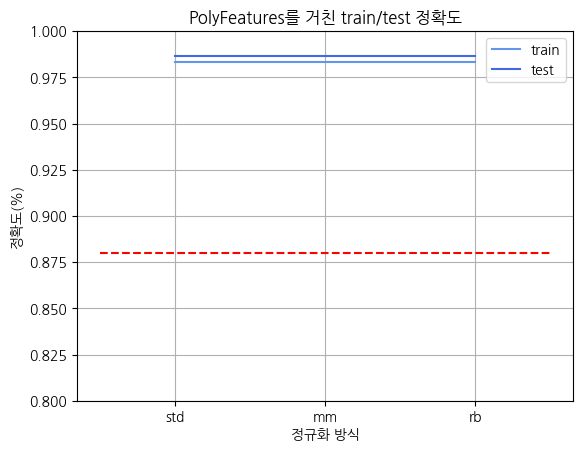

In [72]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
data=np.array(score_list).T
plt.plot(range(3), data[0], color='cornflowerblue', label='train')
plt.plot(range(3), data[1], color='royalblue', label='test')
plt.legend()
plt.hlines(y=0.88, xmin=-0.5, xmax=2.5, colors='r', linestyles='dashed', label='Horizontal Line')
plt.xticks(range(3), ['std', 'mm', 'rb'])
plt.xlabel("정규화 방식")
plt.ylabel("정확도(%)")
plt.title("PolyFeatures를 거친 train/test 정확도")
plt.ylim(0.8, 1)
plt.grid(True)
plt.savefig("PolyFeature True.png")
plt.show()

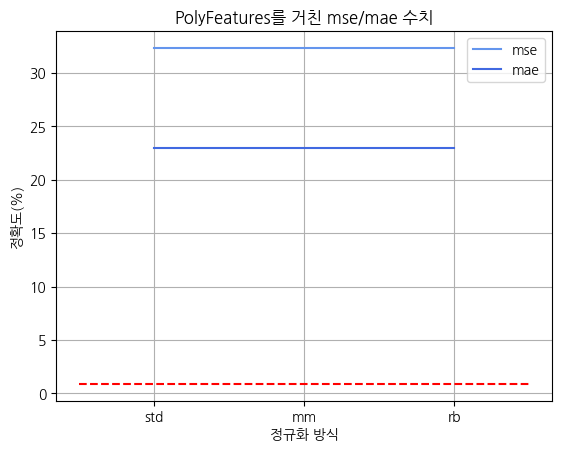

In [73]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
data=np.array(score_list).T
plt.plot(range(3), data[2], color='cornflowerblue', label='mse')
plt.plot(range(3), data[3], color='royalblue', label='mae')
plt.legend()
plt.hlines(y=0.88, xmin=-0.5, xmax=2.5, colors='r', linestyles='dashed', label='Horizontal Line')
plt.xticks(range(3), ['std', 'mm', 'rb'])
plt.xlabel("정규화 방식")
plt.ylabel("정확도(%)")
plt.title("PolyFeatures를 거친 mse/mae 수치")
#plt.ylim(0.0, 1)
plt.grid(True)
plt.savefig("PolyFeature True_E.png")
plt.show()